In [1]:
%cd "../"
%pwd

import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from hybrid_FS import *
from overlap_genes import *
from crossValidation import *

/Users/dormann/Documents/GitHub/src


In [2]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

# Baseline with preselected genes 

In [3]:
#Load preprocess data
DO = np.array(pd.read_csv ('../data/processed_data/D0.csv'))
y = np.array(DO[:,-1],dtype=int)
DO = DO[:,0:-1]

In [4]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO,y)

In [5]:
print(DO.shape, len(pred))
acc = model.score_
print(acc)

(461, 3324) 461
0.4874551971326165


In [6]:
print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (136.0, 143.0, 0.951048951048951, 0.6384976525821596, 0.997377542225238, 0.4874551971326165, 0.9985861961331546, 0.5125448028673835, 0.3615023474178404)


# Mutual information maximizer (MIM)

test 0.9191189097640711 0.08960515296865877
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (206.0, 71.0, 2.9014084507042255, 0.9155555555555556, 0.998338131685509, 0.7436823104693141, 0.9995547327224579, 0.2563176895306859, 0.08444444444444445)


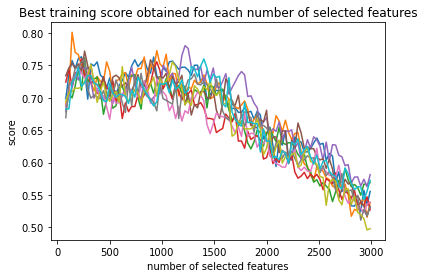

In [9]:
#Define parameters for MIM method
N = np.arange(80,3000,30)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 4, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,DO, FamiliesClusters, compute_precision,True, 10,  MIM, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = DO[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Anova F test

test 0.9017702429675559 0.14090275169342267
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (208.0, 58.0, 3.586206896551724, 0.9203539823008849, 0.9987019671911017, 0.7819548872180451, 0.9995968012902359, 0.21804511278195488, 0.07964601769911504)


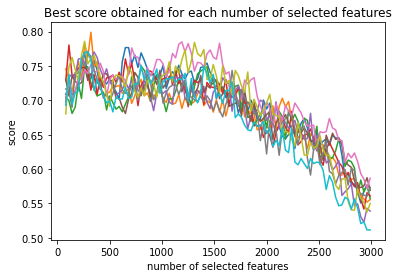

In [10]:
#Define parameters for ANOVA method
N = np.arange(80,3000,30)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,DO, FamiliesClusters, compute_precision,True, 10,  ANOVA, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = DO[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))    

# Hybrid methods

# Mutual information and stimulated annealing

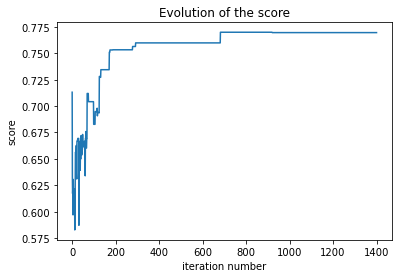

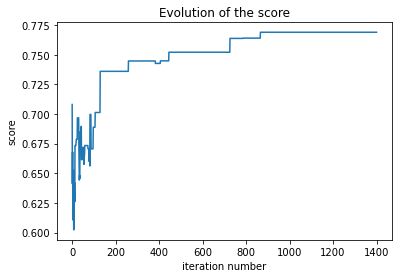

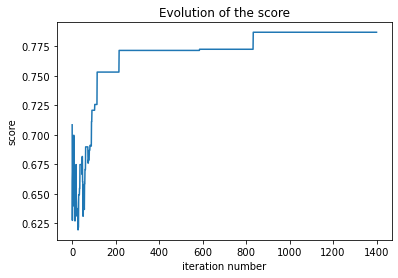

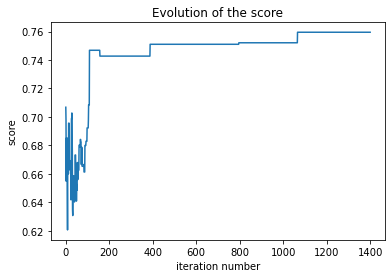

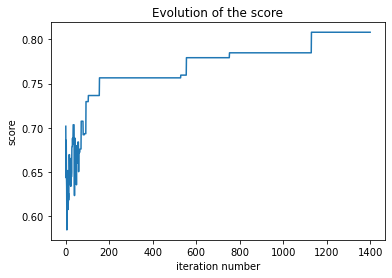

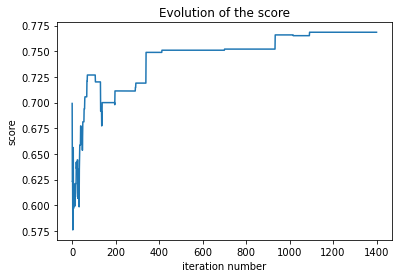

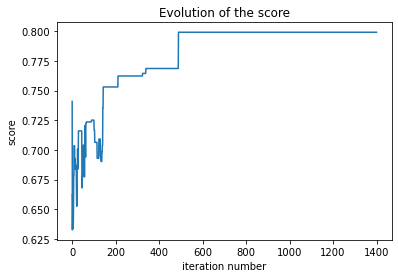

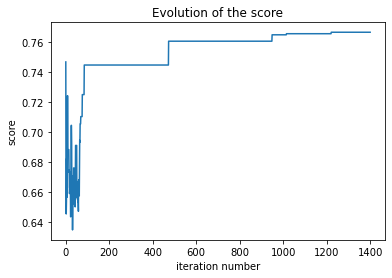

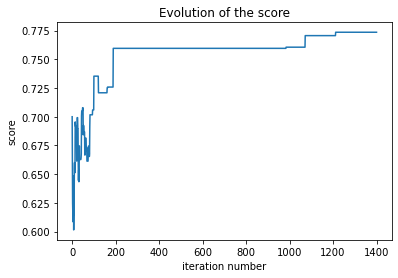

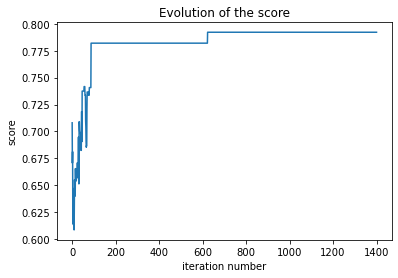

test 0.8750599099071085 0.09855581178640548
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (189.0, 72.0, 2.625, 0.863013698630137, 0.9985148821187682, 0.7241379310344828, 0.9993806643407172, 0.27586206896551724, 0.136986301369863)


In [7]:
#Define parameters for MI + stimulated annealing method
N = np.array([800])
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_iter': 1400, 'n_neighbors': 3, 'p_mutate': 0.1, 'c': 1, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,DO, FamiliesClusters, compute_precision,True, 10,  MI_stimulated_annealing, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = DO[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

# Mutual information and genetic feature selection

In [ ]:
#Define parameters for MI + genetic algorithm method
N = np.array([800])                            
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'n_population': 300, 'crossover_proba': 0.5, 'mutation_proba': 0.2, 'n_generations': 120, 'tournament_size': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,DO, FamiliesClusters, compute_precision,True, 30,  MI_genetic_fs, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = DO[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 